<a href="https://colab.research.google.com/github/dasmadhuchhanda46/Pricefy_Market_segment/blob/main/Hotel_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [94]:
import pandas as pd

# Step 1: Load the CSV (replace with your actual file name)
bangalore_data = pd.read_csv('bangalore.csv')  # If it's an Excel file: pd.read_excel('your_file.xlsx')

# Step 2: View the first few rows
bangalore_data.head()



,Hotel Name,Rating,Rating Description,Reviews,Star Rating,Location,Nearest Landmark,Distance to Landmark,Price,Tax
0,The Park Bangalore,3.9,Very Good,4187.0,5.0,Ulsoor,NaN,NaN,"7,567","2,254"
1,"Keys Select by Lemon Tree Hotels, Whitefield, ...",4.0,Very Good,2201.0,4.0,Brookefield,NaN,NaN,"1,509",531
2,ITC Windsor - A Luxury Collection Hotel,4.4,Excellent,1315.0,5.0,Vasanth Nagar,Bangalore Palace,2.4 km,"9,900",NaN
3,Lemon Tree Premier Ulsoor Lake Bangalore,4.0,Very Good,5089.0,5.0,Sivanchetti Gardens,Ulsoor Lake,770 m,"2,347",918
4,"Keys Select by Lemon Tree Hotels, Hosur Road, ...",4.0,Very Good,3290.0,4.0,Hosur road,NaN,NaN,"2,522","1,014"


In [95]:
bangalore_data.shape

(101, 10)

In [96]:
# Step 3: Basic info
bangalore_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Hotel Name            101 non-null    object 
 1   Rating                100 non-null    float64
 2   Rating Description    100 non-null    object 
 3   Reviews               100 non-null    float64
 4   Star Rating           86 non-null     float64
 5   Location              101 non-null    object 
 6   Nearest Landmark      34 non-null     object 
 7   Distance to Landmark  34 non-null     object 
 8   Price                 101 non-null    object 
 9   Tax                   64 non-null     object 
dtypes: float64(3), object(7)
memory usage: 8.0+ KB


In [97]:
bangalore_data['Rating Description'].unique()

array(['Very Good', 'Excellent', nan, 'Good'], dtype=object)

In [98]:
# Drop the two specified columns
bangalore_data = bangalore_data.drop(columns=['Nearest Landmark', 'Distance to Landmark'])


In [99]:
bangalore_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Hotel Name          101 non-null    object 
 1   Rating              100 non-null    float64
 2   Rating Description  100 non-null    object 
 3   Reviews             100 non-null    float64
 4   Star Rating         86 non-null     float64
 5   Location            101 non-null    object 
 6   Price               101 non-null    object 
 7   Tax                 64 non-null     object 
dtypes: float64(3), object(5)
memory usage: 6.4+ KB


In [100]:
# Define mapping
rating_map = {
    'Excellent': 5,
    'Very Good': 4,
    'Good': 3
}

# Only update 'Star Rating' where it's null
bangalore_data.loc[bangalore_data['Star Rating'].isna(), 'Star Rating'] = (
    bangalore_data.loc[bangalore_data['Star Rating'].isna(), 'Rating Description']
    .map(rating_map)
    .fillna(2)
)


In [101]:
bangalore_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Hotel Name          101 non-null    object 
 1   Rating              100 non-null    float64
 2   Rating Description  100 non-null    object 
 3   Reviews             100 non-null    float64
 4   Star Rating         101 non-null    float64
 5   Location            101 non-null    object 
 6   Price               101 non-null    object 
 7   Tax                 64 non-null     object 
dtypes: float64(3), object(5)
memory usage: 6.4+ KB


In [102]:
# bangalore_data['price'].fillna(0, inplace=True)
bangalore_data['Tax'].fillna(0, inplace=True)

/tmp/ipython-input-102-1055588081.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  bangalore_data['Tax'].fillna(0, inplace=True)


In [103]:
bangalore_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Hotel Name          101 non-null    object 
 1   Rating              100 non-null    float64
 2   Rating Description  100 non-null    object 
 3   Reviews             100 non-null    float64
 4   Star Rating         101 non-null    float64
 5   Location            101 non-null    object 
 6   Price               101 non-null    object 
 7   Tax                 101 non-null    object 
dtypes: float64(3), object(5)
memory usage: 6.4+ KB


In [104]:
# Step 4: Clean column names (optional but recommended)
bangalore_data.columns = bangalore_data.columns.str.strip().str.replace(" ", "_").str.lower()

# Step 5: Check for missing values
bangalore_data.isnull().sum()

,0
hotel_name,0
rating,1
rating_description,1
reviews,1
star_rating,0
location,0
price,0
tax,0


In [105]:
bangalore_data.dropna(inplace=True)

In [106]:
bangalore_data.shape

(100, 8)

In [107]:
bangalore_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 0 to 100
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   hotel_name          100 non-null    object 
 1   rating              100 non-null    float64
 2   rating_description  100 non-null    object 
 3   reviews             100 non-null    float64
 4   star_rating         100 non-null    float64
 5   location            100 non-null    object 
 6   price               100 non-null    object 
 7   tax                 100 non-null    object 
dtypes: float64(3), object(5)
memory usage: 7.0+ KB


In [108]:
bangalore_data

,hotel_name,rating,rating_description,reviews,star_rating,location,price,tax
0,The Park Bangalore,3.9,Very Good,4187.0,5.0,Ulsoor,"7,567","2,254"
1,"Keys Select by Lemon Tree Hotels, Whitefield, ...",4.0,Very Good,2201.0,4.0,Brookefield,"1,509",531
2,ITC Windsor - A Luxury Collection Hotel,4.4,Excellent,1315.0,5.0,Vasanth Nagar,"9,900",0
3,Lemon Tree Premier Ulsoor Lake Bangalore,4.0,Very Good,5089.0,5.0,Sivanchetti Gardens,"2,347",918
4,"Keys Select by Lemon Tree Hotels, Hosur Road, ...",4.0,Very Good,3290.0,4.0,Hosur road,"2,522","1,014"
...,...,...,...,...,...,...,...,...
96,Shravanthi Sarovar Portico JP Nagar,3.6,Very Good,139.0,4.0,Outer Ring Road,"3,977",804
97,"Vivanta Bengaluru, Whitefield",4.3,Excellent,959.0,5.0,Whitefield,"7,500",0
98,Melange Astris\r\nLike a 3,4.1,Very Good,1006.0,4.0,Richmond road,"4,300",969
99,Octave Church Inn,3.5,Very Good,712.0,3.0,Church Street,"1,669",337


In [109]:
bangalore_data.columns

Index(['hotel_name', 'rating', 'rating_description', 'reviews', 'star_rating',
       'location', 'price', 'tax'],
      dtype='object')

In [110]:
bangalore_data['price'] = (
    bangalore_data['price']
    .astype(str)                      # Ensure all values are strings
    .str.replace(',', '', regex=False)  # Remove commas
    .astype(float)                    # Convert to float
)


In [111]:
bangalore_data['tax'] = (
    bangalore_data['tax']
    .astype(str)                      # Ensure all values are strings
    .str.replace(',', '', regex=False)  # Remove commas
    .astype(float)                    # Convert to float
)


In [112]:
# Step 6: Example: Add a 'total_price' column (price + tax)
# bangalore_data['total_price'] = bangalore_data['price'] + bangalore_data['tax']
# bangalore_data[['price', 'tax']] = bangalore_data[['price', 'tax']].fillna(0)
# bangalore_data['price'] = pd.to_numeric(bangalore_data['price'], errors='coerce')
# bangalore_data['tax'] = pd.to_numeric(bangalore_data['tax'], errors='coerce')

bangalore_data['total_price'] = bangalore_data['price'] + bangalore_data['tax']


In [113]:
bangalore_data

,hotel_name,rating,rating_description,reviews,star_rating,location,price,tax,total_price
0,The Park Bangalore,3.9,Very Good,4187.0,5.0,Ulsoor,7567.0,2254.0,9821.0
1,"Keys Select by Lemon Tree Hotels, Whitefield, ...",4.0,Very Good,2201.0,4.0,Brookefield,1509.0,531.0,2040.0
2,ITC Windsor - A Luxury Collection Hotel,4.4,Excellent,1315.0,5.0,Vasanth Nagar,9900.0,0.0,9900.0
3,Lemon Tree Premier Ulsoor Lake Bangalore,4.0,Very Good,5089.0,5.0,Sivanchetti Gardens,2347.0,918.0,3265.0
4,"Keys Select by Lemon Tree Hotels, Hosur Road, ...",4.0,Very Good,3290.0,4.0,Hosur road,2522.0,1014.0,3536.0
...,...,...,...,...,...,...,...,...,...
96,Shravanthi Sarovar Portico JP Nagar,3.6,Very Good,139.0,4.0,Outer Ring Road,3977.0,804.0,4781.0
97,"Vivanta Bengaluru, Whitefield",4.3,Excellent,959.0,5.0,Whitefield,7500.0,0.0,7500.0
98,Melange Astris\r\nLike a 3,4.1,Very Good,1006.0,4.0,Richmond road,4300.0,969.0,5269.0
99,Octave Church Inn,3.5,Very Good,712.0,3.0,Church Street,1669.0,337.0,2006.0


In [114]:
bangalore_data.isnull().sum()

,0
hotel_name,0
rating,0
rating_description,0
reviews,0
star_rating,0
location,0
price,0
tax,0
total_price,0


In [115]:
bangalore_data.dropna(inplace=True)

In [116]:
bangalore_data.head()

,hotel_name,rating,rating_description,reviews,star_rating,location,price,tax,total_price
0,The Park Bangalore,3.9,Very Good,4187.0,5.0,Ulsoor,7567.0,2254.0,9821.0
1,"Keys Select by Lemon Tree Hotels, Whitefield, ...",4.0,Very Good,2201.0,4.0,Brookefield,1509.0,531.0,2040.0
2,ITC Windsor - A Luxury Collection Hotel,4.4,Excellent,1315.0,5.0,Vasanth Nagar,9900.0,0.0,9900.0
3,Lemon Tree Premier Ulsoor Lake Bangalore,4.0,Very Good,5089.0,5.0,Sivanchetti Gardens,2347.0,918.0,3265.0
4,"Keys Select by Lemon Tree Hotels, Hosur Road, ...",4.0,Very Good,3290.0,4.0,Hosur road,2522.0,1014.0,3536.0


In [117]:
avg_price_by_location = bangalore_data.groupby('location')['total_price'].mean().reset_index()
avg_price_by_location


,location,total_price
0,Ashok Nagar,7248.500000
1,Bannerghatta Main road,7695.000000
2,Bilekahalli,2987.000000
3,Brookefield,2617.250000
4,Church Street,2006.000000
5,Cunningham Road,5009.000000
6,Domlur Layout,5536.333333
7,Electronic City,3125.500000
8,Gandhi Nagar,4917.800000
9,Ganganagar,14875.000000


In [118]:
bangalore_data['total_price'].dtype

dtype('float64')

In [119]:
# Rename column for clarity
avg_price_by_location.columns = ['location', 'average_price']

# Sort by average price (optional)
avg_price_by_location = avg_price_by_location.sort_values(by='average_price', ascending=False)

In [120]:
avg_price_by_location

,location,average_price
14,In Devanhalli,25000.000000
9,Ganganagar,14875.000000
24,Palace road,13500.000000
33,Tirumanahalli,11000.000000
23,Palace road,10200.000000
10,HAL old airport road,9133.666667
35,Ulsoor,8767.750000
30,Seshadripuram,8052.000000
37,Vasanth Nagar,7949.500000
20,Mathikere,7704.000000


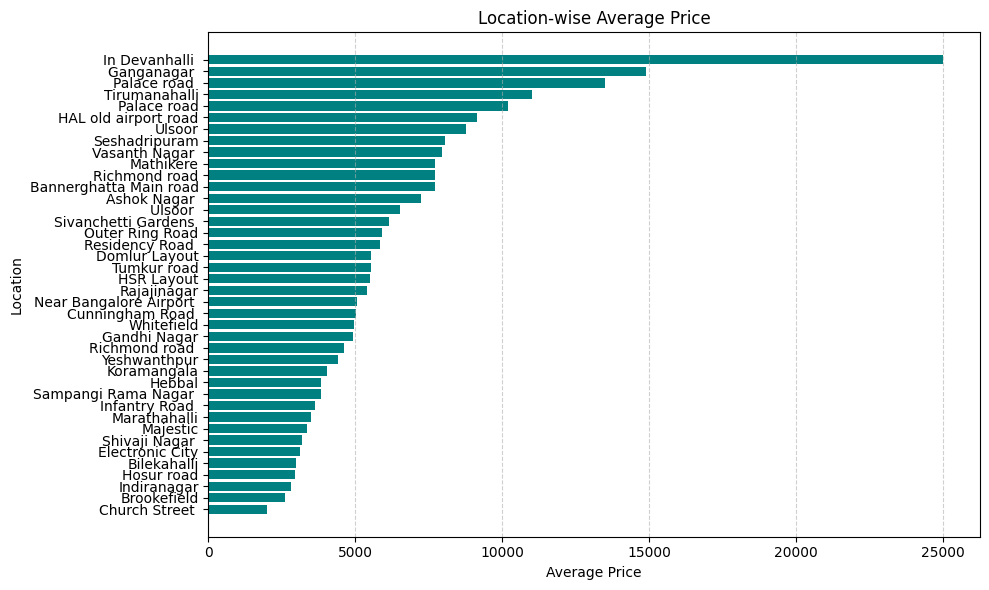

In [122]:
import matplotlib.pyplot as plt

# Sort the data by average_price (optional)
avg_price_by_location = avg_price_by_location.sort_values(by='average_price', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(avg_price_by_location['location'], avg_price_by_location['average_price'], color='teal')

# Labels and title
plt.xlabel("Average Price")
plt.ylabel("Location")
plt.title("Location-wise Average Price")
plt.gca().invert_yaxis()  # Highest price at the top
plt.grid(axis='x', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


In [3]:
import pandas as pd

# Step 1: Load the CSV (replace with your actual file name)
hotel_data = pd.read_csv('Hotel Reservations.csv')  # If it's an Excel file: pd.read_excel('your_file.xlsx')

# Step 2: View the first few rows
hotel_data.head()



,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [4]:
hotel_data.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [5]:
hotel_data.isnull().sum()

,0
Booking_ID,0
no_of_adults,0
no_of_children,0
no_of_weekend_nights,0
no_of_week_nights,0
type_of_meal_plan,0
required_car_parking_space,0
room_type_reserved,0
lead_time,0
arrival_year,0


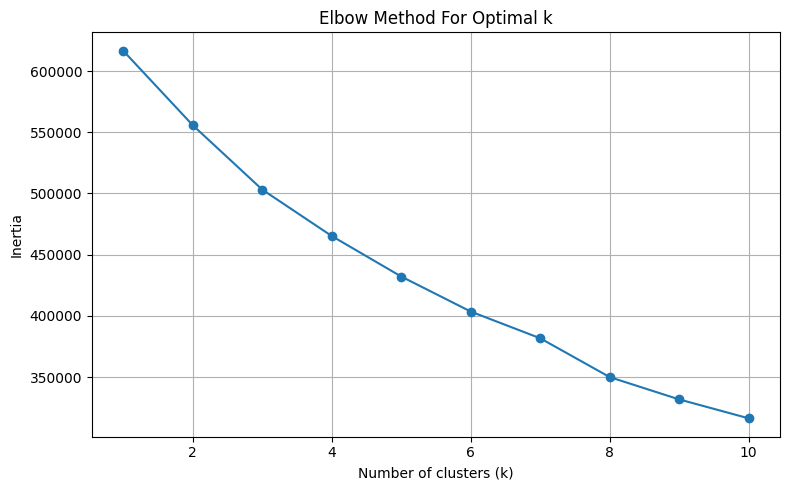

In [6]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Drop non-informative or ID columns
df_seg = hotel_data.drop(['Booking_ID', 'booking_status'], axis=1)

# Encode categorical features
categorical_cols = df_seg.select_dtypes(include='object').columns
df_encoded = df_seg.copy()

le = LabelEncoder()
for col in categorical_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])

# Scale the features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_encoded)

# Use Elbow Method to determine optimal number of clusters
inertia = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.tight_layout()
plt.show()


/tmp/ipython-input-7-2822355852.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='no_of_special_requests', data=cluster_0, palette='viridis')
/tmp/ipython-input-7-2822355852.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='type_of_meal_plan', data=cluster_0_original, palette='coolwarm')


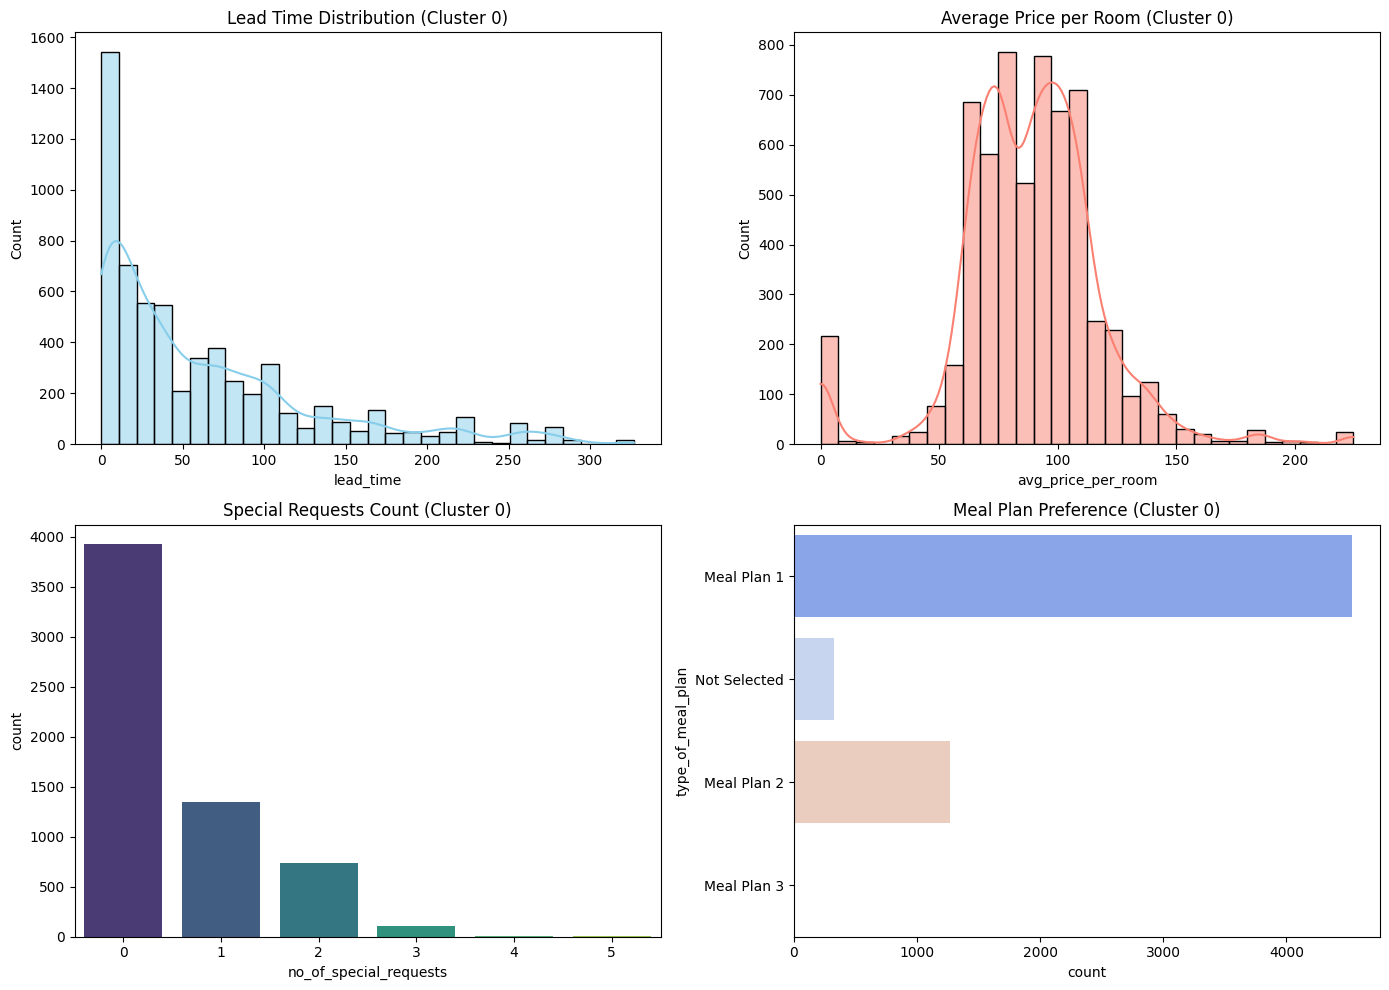

In [7]:

# Prepare the data
df_seg = hotel_data.drop(['Booking_ID', 'booking_status'], axis=1)

# Encode categorical features
categorical_cols = df_seg.select_dtypes(include='object').columns
df_encoded = df_seg.copy()

le = LabelEncoder()
for col in categorical_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])

# Scale features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_encoded)

# KMeans clustering (k=4)
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df_encoded['Cluster'] = kmeans.fit_predict(df_scaled)

# Extract Cluster 0
cluster_0 = df_encoded[df_encoded['Cluster'] == 0]

# Select relevant features for visualization
features_to_plot = ['lead_time', 'avg_price_per_room', 'no_of_special_requests', 'type_of_meal_plan']

# Create a copy with original categories for 'type_of_meal_plan'
hotel_data['Cluster'] = df_encoded['Cluster']
cluster_0_original = hotel_data[hotel_data['Cluster'] == 0]

# Plot the distribution of features
plt.figure(figsize=(14, 10))

# Lead time
plt.subplot(2, 2, 1)
sns.histplot(cluster_0['lead_time'], bins=30, kde=True, color='skyblue')
plt.title('Lead Time Distribution (Cluster 0)')

# Average price per room
plt.subplot(2, 2, 2)
sns.histplot(cluster_0['avg_price_per_room'], bins=30, kde=True, color='salmon')
plt.title('Average Price per Room (Cluster 0)')

# Special requests
plt.subplot(2, 2, 3)
sns.countplot(x='no_of_special_requests', data=cluster_0, palette='viridis')
plt.title('Special Requests Count (Cluster 0)')

# Meal plan
plt.subplot(2, 2, 4)
sns.countplot(y='type_of_meal_plan', data=cluster_0_original, palette='coolwarm')
plt.title('Meal Plan Preference (Cluster 0)')

plt.tight_layout()
plt.show()


/tmp/ipython-input-8-4246099661.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='no_of_special_requests', data=cluster_data, palette='viridis')
/tmp/ipython-input-8-4246099661.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='type_of_meal_plan', data=cluster_original, palette='coolwarm')


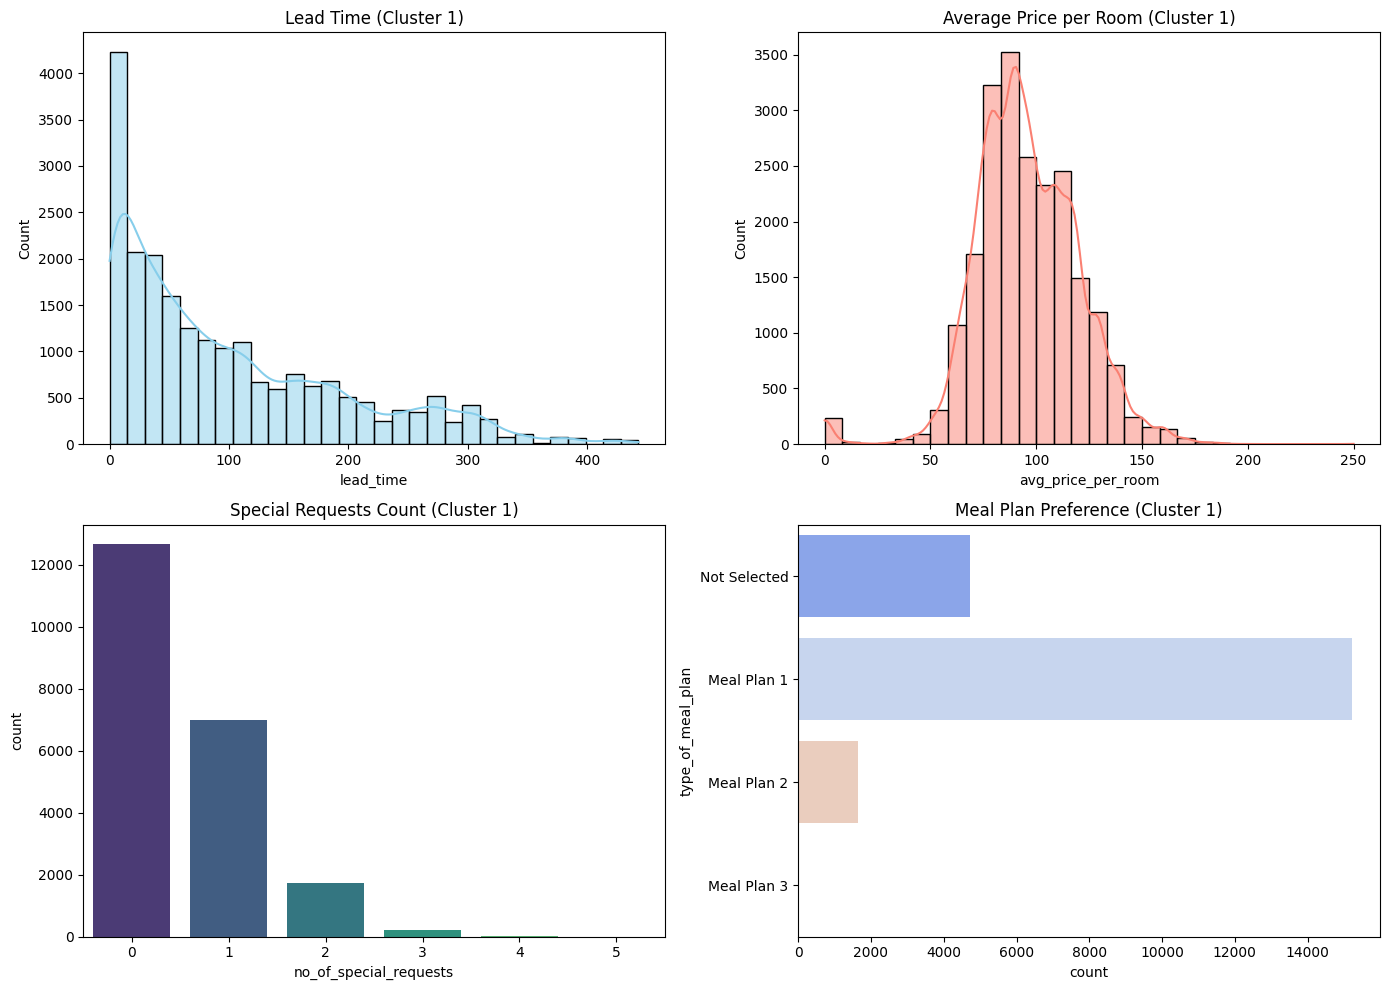

/tmp/ipython-input-8-4246099661.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='no_of_special_requests', data=cluster_data, palette='viridis')
/tmp/ipython-input-8-4246099661.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='type_of_meal_plan', data=cluster_original, palette='coolwarm')


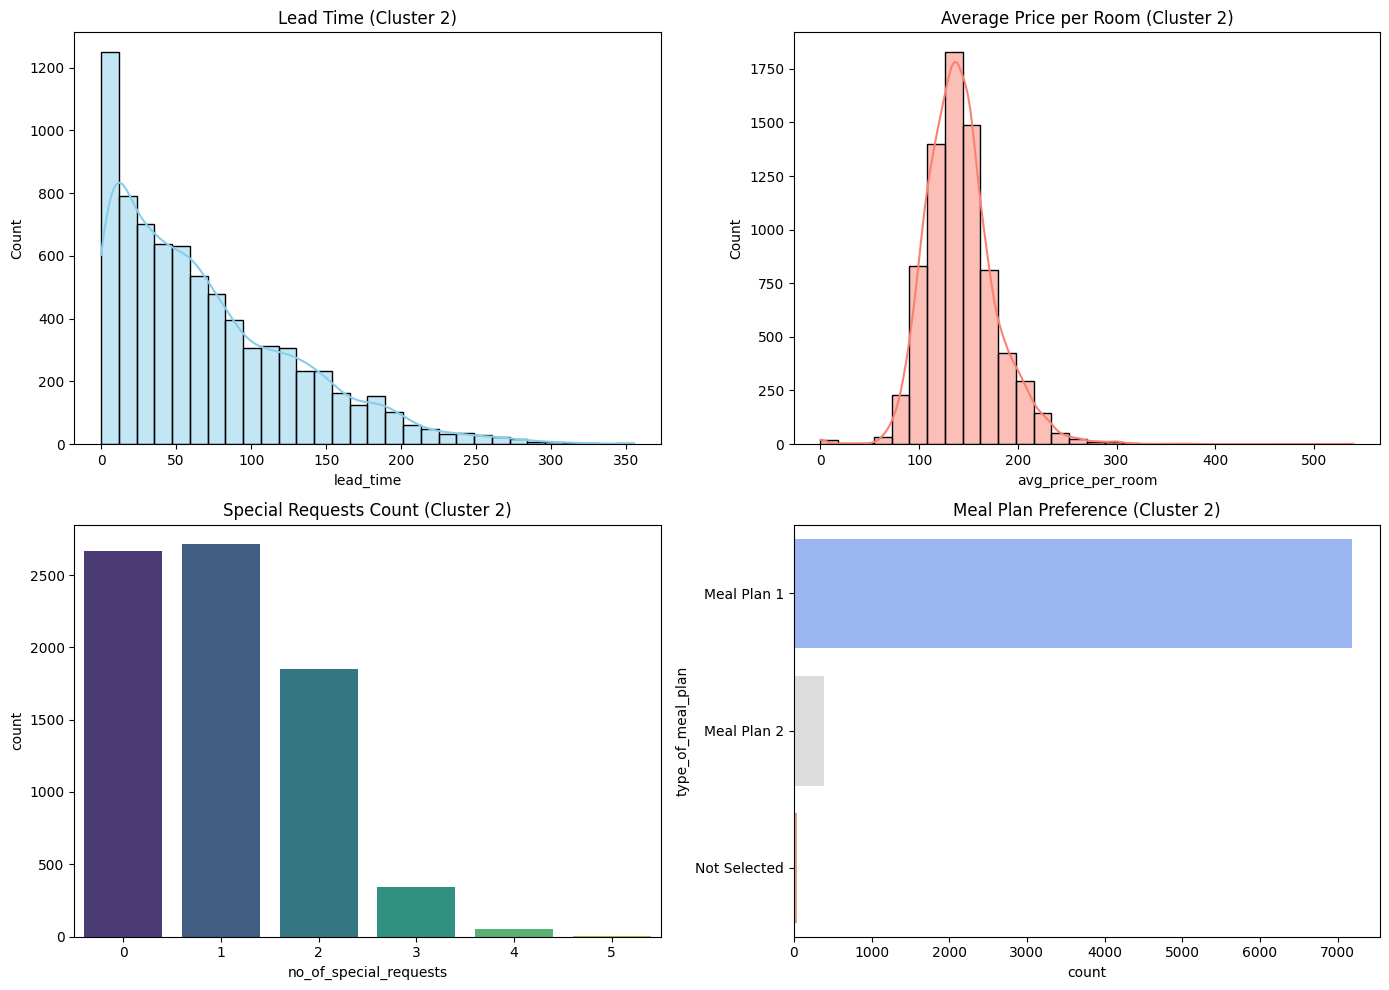

/tmp/ipython-input-8-4246099661.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='no_of_special_requests', data=cluster_data, palette='viridis')
/tmp/ipython-input-8-4246099661.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='type_of_meal_plan', data=cluster_original, palette='coolwarm')


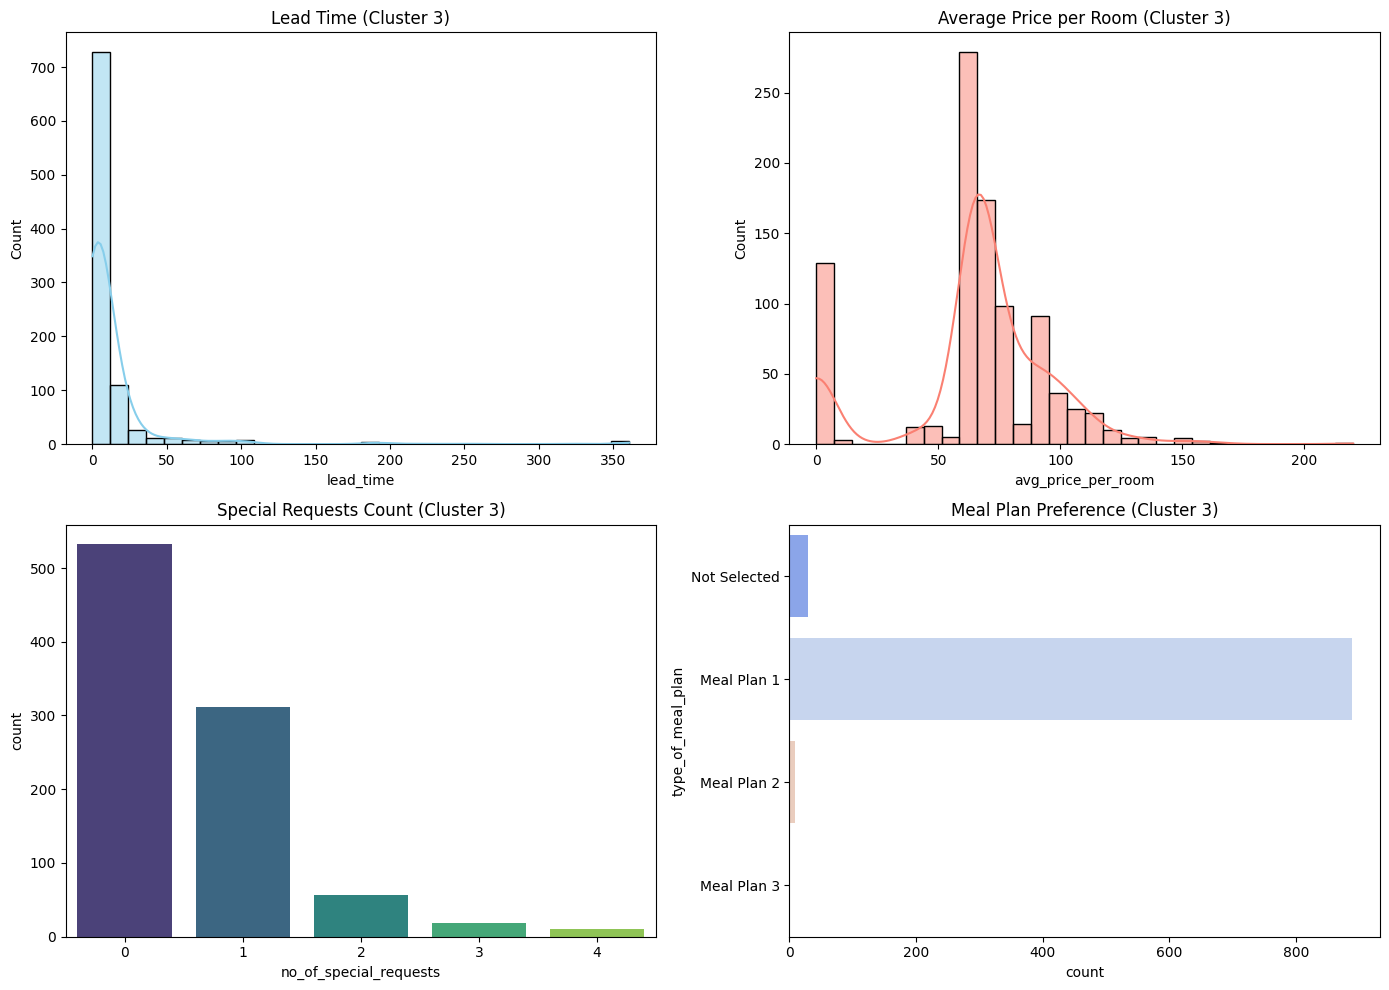

In [8]:
df_encoded = df_seg.copy()
le = LabelEncoder()
for col in categorical_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])

# Scale features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_encoded)

# KMeans clustering (k=4)
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df_encoded['Cluster'] = kmeans.fit_predict(df_scaled)

# Add Cluster info back to original df
hotel_data['Cluster'] = df_encoded['Cluster']

# Helper function to plot cluster insights
def plot_cluster_features(cluster_num, df_encoded, df_original):
    cluster_data = df_encoded[df_encoded['Cluster'] == cluster_num]
    cluster_original = df_original[df_original['Cluster'] == cluster_num]

    plt.figure(figsize=(14, 10))

    # Lead time
    plt.subplot(2, 2, 1)
    sns.histplot(cluster_data['lead_time'], bins=30, kde=True, color='skyblue')
    plt.title(f'Lead Time (Cluster {cluster_num})')

    # Avg price per room
    plt.subplot(2, 2, 2)
    sns.histplot(cluster_data['avg_price_per_room'], bins=30, kde=True, color='salmon')
    plt.title(f'Average Price per Room (Cluster {cluster_num})')

    # Special requests
    plt.subplot(2, 2, 3)
    sns.countplot(x='no_of_special_requests', data=cluster_data, palette='viridis')
    plt.title(f'Special Requests Count (Cluster {cluster_num})')

    # Meal plan
    plt.subplot(2, 2, 4)
    sns.countplot(y='type_of_meal_plan', data=cluster_original, palette='coolwarm')
    plt.title(f'Meal Plan Preference (Cluster {cluster_num})')

    plt.tight_layout()
    plt.show()

# Generate plots for Cluster 1, 2, and 3
plot_cluster_features(1, df_encoded, hotel_data)
plot_cluster_features(2, df_encoded, hotel_data)
plot_cluster_features(3, df_encoded, hotel_data)